In [1]:
#Import libraries
import pandas as pd
from sklearn import preprocessing
preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random
import numpy as np

In [2]:
#load csv File
dataset=pd.read_csv("waterQuality1.csv")

# Check missing values

In [3]:
dataset.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

# check data type

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [8]:
# Feature and target data
y=dataset["is_safe"]
x=dataset.drop('is_safe',axis=1)


In [148]:
#split data into test and train
x_train,x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.30,random_state=30)

In [149]:
#Scaling or normalization to x_test and x_train (between 0 and 1)
Stc_x = StandardScaler()
x_train = Stc_x.fit_transform(x_train)
x_test = Stc_x.transform(x_test)

In [150]:
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [151]:
#Accuracy before feature selection
# Predict on the test data
y_pred = rf_classifier.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using just Random forest:", accuracy * 100 ,"%")

Accuracy using just Random forest: 95.83159649854106 %


# Confusion matrix for model before feature selection

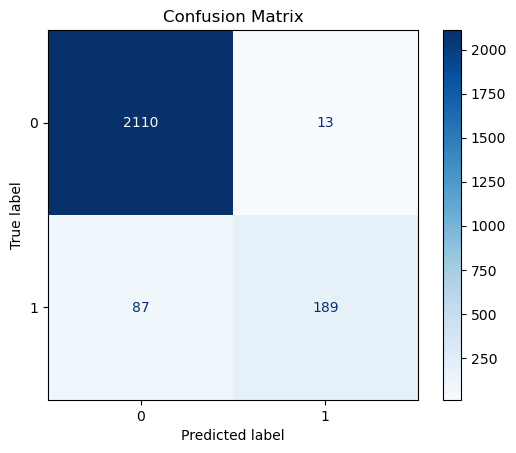

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2123
           1       0.94      0.68      0.79       276

    accuracy                           0.96      2399
   macro avg       0.95      0.84      0.88      2399
weighted avg       0.96      0.96      0.96      2399



In [152]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# You may also want to print the classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)


# Start to prepare PSO algorithm for select best features

In [153]:
def calculate_accuracy(x):
    x=dataset[x]
    x_train,x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.30,random_state=30)    
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy * 100 ,"%")
    return accuracy


In [154]:
columnsName=dataset.drop('is_safe', axis= 1).columns.values.tolist()
columnsName

['aluminium',
 'ammonia',
 'arsenic',
 'barium',
 'cadmium',
 'chloramine',
 'chromium',
 'copper',
 'flouride',
 'bacteria',
 'viruses',
 'lead',
 'nitrates',
 'nitrites',
 'mercury',
 'perchlorate',
 'radium',
 'selenium',
 'silver',
 'uranium']

In [155]:
#generate random number to positions
#each positions has 20 equls number of features
#then append positions to particles that equal 50 rows
columnsName1=[0,1]
Particles =[]
for i in range(50):
    positions=[]
    for i in range(20):
        item = random.choice(tuple(columnsName1))
        positions.append(item)
    Particles.append(positions)

In [156]:
positions

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]

In [157]:
Particles

[[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
 [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [158]:
#takes features that equals 1
def data(Particles):
    f_Particles=[]
    for i in range(len(Particles)):
        if Particles[i]==1:
                f_Particles.append(columnsName[i])
    return f_Particles


In [159]:
pb = []

def checkpersonalnest():
    for i in range(len(Particles)):
        fitness_value = calculate_accuracy(data(Particles[i]))
        pb.append(fitness_value)
        print(f"Fitness value of Particle {i}: {fitness_value:.4f}")

checkpersonalnest()


Accuracy: 89.28720300125053 %
Fitness value of Particle 0: 0.8929
Accuracy: 86.91121300541892 %
Fitness value of Particle 1: 0.8691
Accuracy: 87.3697373905794 %
Fitness value of Particle 2: 0.8737
Accuracy: 87.49478949562317 %
Fitness value of Particle 3: 0.8749
Accuracy: 83.8682784493539 %
Fitness value of Particle 4: 0.8387
Accuracy: 87.32805335556482 %
Fitness value of Particle 5: 0.8733
Accuracy: 88.12005002084203 %
Fitness value of Particle 6: 0.8812
Accuracy: 83.82659441433931 %
Fitness value of Particle 7: 0.8383
Accuracy: 88.28678616090038 %
Fitness value of Particle 8: 0.8829
Accuracy: 84.11838265944144 %
Fitness value of Particle 9: 0.8412
Accuracy: 83.74322634431013 %
Fitness value of Particle 10: 0.8374
Accuracy: 85.28553563984994 %
Fitness value of Particle 11: 0.8529
Accuracy: 86.2442684451855 %
Fitness value of Particle 12: 0.8624
Accuracy: 83.65985827428095 %
Fitness value of Particle 13: 0.8366
Accuracy: 91.62150896206754 %
Fitness value of Particle 14: 0.9162
Accuracy

In [160]:
# w * previous velocity = 0 + r1 = random number between 0 and 1 * c1 = 1*(pb - xold) + r2 * c2 * (gb - xold)
def checkvelocity(globalbest):
    velocity=[]
    for j in range(len(Particles)):
        velocity.append(list(0 + 1*(np.random.random(1)[0])*(np.array(Particles[j])-np.array(Particles[j])) + 1*(np.random.random(1)[0])*(np.array(globalbest)-np.array(Particles[j]))))
    return velocity


In [161]:
def addingParticles(velocity):
    #particles iteration2
    Particles2=[]
    for i in range(len(velocity)):
        newparticle=[]
        for j in range(len(velocity[i])):# 50 particle
            newparticle.append(Particles[i][j]+velocity[i][j]) # 20 feature
        Particles2.append(newparticle)
    return Particles2

In [162]:
def normalize(Particles2):
    for l in range(len(Particles2)):
        for m in range(len(Particles2[l])):
            if Particles2[l][m] > 0.5:
                Particles2[l][m]=1
            else:
                Particles2[l][m]=0
    return Particles2

In [163]:
def checkpd(Particles2):
    personal=[]
    for i in range(len(Particles2)):
        personal.append(calaculate_accuracy(data(Particles2[i])))
    for j in range(len(personal)):
        if(personal[j]>pb[j]):
            Particles[j]=Particles2[j]
            pb[j]=personal[j]
    return personal

In [164]:
max(pb)
ind = pb.index(max(pb))
globalbest = Particles[ind]
for i in range(30):#30 iterations 
    print("Iteration" , i+2,": ")
    Particles2 =[]
    personal = []
    velocity=checkvelocity(globalbest)#new velocity
    Particles2=addingParticles(velocity)#new positions in the particle
    Particles2=normalize(Particles2)
    personal=checkpd(Particles2)
    globalbest=[]
    max(pb)
    ind = pb.index(max(pb))
    globalbest= Particles[ind]
                
    

Iteration 2 : 
Accuracy: 87.5625 %
Accuracy: 96.5 %
Accuracy: 96.625 %
Accuracy: 96.5625 %
Accuracy: 96.5 %
Accuracy: 86.0625 %
Accuracy: 96.5625 %
Accuracy: 82.6875 %
Accuracy: 96.5625 %
Accuracy: 83.0 %
Accuracy: 82.8125 %
Accuracy: 84.8125 %
Accuracy: 96.4375 %
Accuracy: 82.875 %
Accuracy: 91.25 %
Accuracy: 96.75 %
Accuracy: 94.125 %
Accuracy: 85.0 %
Accuracy: 96.4375 %
Accuracy: 96.375 %
Accuracy: 95.4375 %
Accuracy: 91.125 %
Accuracy: 96.25 %
Accuracy: 96.5 %
Accuracy: 94.25 %
Accuracy: 96.375 %
Accuracy: 96.5 %
Accuracy: 96.375 %
Accuracy: 96.375 %
Accuracy: 88.5 %
Accuracy: 84.3125 %
Accuracy: 96.5 %
Accuracy: 96.375 %
Accuracy: 96.5 %
Accuracy: 96.5625 %
Accuracy: 83.375 %
Accuracy: 85.25 %
Accuracy: 96.5625 %
Accuracy: 90.25 %
Accuracy: 96.375 %
Accuracy: 96.6875 %
Accuracy: 84.0625 %
Accuracy: 96.75 %
Accuracy: 96.6875 %
Accuracy: 96.75 %
Accuracy: 96.4375 %
Accuracy: 96.75 %
Accuracy: 85.875 %
Accuracy: 96.4375 %
Accuracy: 84.3125 %
Iteration 3 : 
Accuracy: 96.5625 %
Accurac

Accuracy: 96.75 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.5 %
Accuracy: 96.375 %
Accuracy: 96.3125 %
Accuracy: 96.4375 %
Accuracy: 96.5625 %
Accuracy: 96.375 %
Accuracy: 96.4375 %
Accuracy: 96.125 %
Accuracy: 96.5 %
Accuracy: 96.25 %
Accuracy: 96.3125 %
Accuracy: 96.625 %
Accuracy: 96.375 %
Accuracy: 96.4375 %
Accuracy: 96.75 %
Accuracy: 96.25 %
Accuracy: 96.3125 %
Accuracy: 96.75 %
Accuracy: 96.3125 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.75 %
Accuracy: 96.3125 %
Accuracy: 96.5625 %
Accuracy: 96.375 %
Iteration 11 : 
Accuracy: 96.625 %
Accuracy: 96.625 %
Accuracy: 96.625 %
Accuracy: 96.5 %
Accuracy: 96.5 %
Accuracy: 96.625 %
Accuracy: 96.5625 %
Accuracy: 96.3125 %
Accuracy: 96.625 %
Accuracy: 96.5 %
Accuracy: 96.625 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.3125 %
Accuracy: 96.6875 %
Accuracy: 96.6875 %
Accuracy: 96.5625 %
Accuracy: 96.4375 %
Accuracy: 96.5 %
Accuracy: 96.625 %
Accuracy: 96.5 %
Accuracy: 96.6875 %
Accuracy: 96.4375 %
Accuracy: 

Accuracy: 96.6875 %
Accuracy: 96.5625 %
Accuracy: 96.5625 %
Accuracy: 96.5625 %
Accuracy: 96.375 %
Accuracy: 96.625 %
Iteration 19 : 
Accuracy: 96.1875 %
Accuracy: 96.625 %
Accuracy: 96.125 %
Accuracy: 96.5625 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.375 %
Accuracy: 96.3125 %
Accuracy: 96.5625 %
Accuracy: 96.375 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.625 %
Accuracy: 96.5 %
Accuracy: 96.375 %
Accuracy: 96.5625 %
Accuracy: 96.5 %
Accuracy: 96.75 %
Accuracy: 96.8125 %
Accuracy: 96.4375 %
Accuracy: 96.5 %
Accuracy: 96.5625 %
Accuracy: 96.3125 %
Accuracy: 96.6875 %
Accuracy: 96.5 %
Accuracy: 96.3125 %
Accuracy: 96.3125 %
Accuracy: 96.5625 %
Accuracy: 96.625 %
Accuracy: 96.625 %
Accuracy: 96.375 %
Accuracy: 96.5625 %
Accuracy: 96.5625 %
Accuracy: 96.625 %
Accuracy: 96.5 %
Accuracy: 96.5625 %
Accuracy: 96.25 %
Accuracy: 96.625 %
Accuracy: 96.25 %
Accuracy: 96.5625 %
Accuracy: 96.4375 %
Accuracy: 96.3125 %
Accuracy: 96.6875 %
Accuracy: 96.4375 %
Accuracy: 96.375 %

Accuracy: 96.375 %
Accuracy: 96.5 %
Accuracy: 96.5 %
Accuracy: 96.4375 %
Accuracy: 96.5 %
Accuracy: 96.75 %
Accuracy: 96.5625 %
Accuracy: 96.5 %
Accuracy: 96.375 %
Accuracy: 96.3125 %
Accuracy: 96.5 %
Accuracy: 96.5 %
Accuracy: 96.5625 %
Accuracy: 96.625 %
Accuracy: 96.5 %
Accuracy: 96.5 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.5 %
Accuracy: 96.4375 %
Accuracy: 96.375 %
Accuracy: 96.3125 %
Accuracy: 96.5625 %
Accuracy: 96.5625 %
Accuracy: 96.4375 %
Accuracy: 96.625 %
Accuracy: 96.4375 %
Accuracy: 96.375 %
Accuracy: 96.4375 %
Accuracy: 96.4375 %
Accuracy: 96.5625 %
Accuracy: 96.625 %
Accuracy: 96.3125 %
Iteration 28 : 
Accuracy: 96.4375 %
Accuracy: 96.375 %
Accuracy: 96.6875 %
Accuracy: 96.25 %
Accuracy: 96.625 %
Accuracy: 96.625 %
Accuracy: 96.5625 %
Accuracy: 96.625 %
Accuracy: 96.5625 %
Accuracy: 96.3125 %
Accuracy: 96.3125 %
Accuracy: 96.5 %
Accuracy: 96.75 %
Accuracy: 96.5 %
Accuracy: 96.625 %
Accuracy: 96.25 %
Accuracy: 96.5 %
Accuracy: 96.375 %
Accuracy: 96.625 %
Ac

In [165]:
max(pb)

0.96875

In [166]:
ind = pb.index(max(pb))
globalbest= Particles[ind]

In [167]:
print("The best features to optimize the accuracy: ",data(globalbest))

The best features to optimize the accuracy:  ['aluminium', 'ammonia', 'cadmium', 'chloramine', 'chromium', 'nitrates', 'nitrites', 'perchlorate', 'radium', 'silver', 'uranium']


In [168]:
x2 = dataset[data(globalbest)]
x_train2,x_test2, y_train2,  y_test2 = train_test_split(x2, y, test_size = 0.30,random_state=30)
Stc_x = StandardScaler()
x_train2 = Stc_x.fit_transform(x_train2)
x_test2 = Stc_x.transform(x_test2)

In [169]:
rf_classifier2 = RandomForestClassifier()
# Train the classifier
rf_classifier2.fit(x_train2, y_train2)

RandomForestClassifier()

In [170]:
#Accuracy before feature selection
# Predict on the test data
y_pred2 = rf_classifier2.predict(x_test2)
# Calculate accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy using Random forest and PSO optimization:", accuracy2 * 100 ,"%")

Accuracy using Random forest and PSO optimization: 96.54022509378908 %


# Confusion matrix for model after feature selection

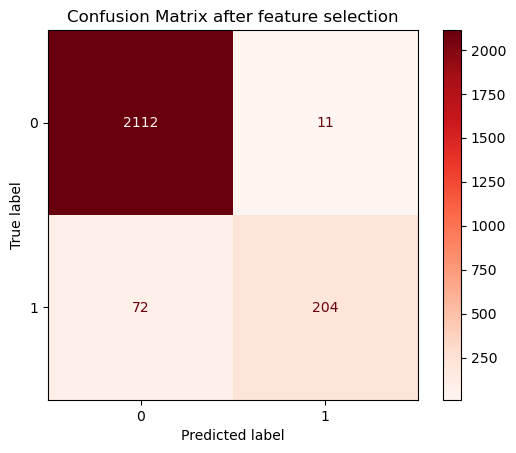

Classification report after feature selection:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2123
           1       0.95      0.74      0.83       276

    accuracy                           0.97      2399
   macro avg       0.96      0.87      0.91      2399
weighted avg       0.96      0.97      0.96      2399



In [178]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
CM = confusion_matrix(y_test2, y_pred2)

# Display the confusion matrix using a heatmap
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM)
disp2.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix after feature selection')
plt.show()


# You may also want to print the classification report
report2 = classification_report(y_test2, y_pred2)
print("Classification report after feature selection:")
print(report2)
